Logistic Function / Sigmoid Function

In [1]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

<function matplotlib.pyplot.show(*args, **kw)>

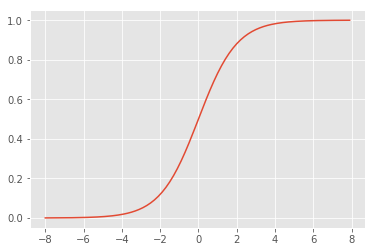

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

z=np.arange(-8,8,0.1)
y= sigmoid(z)
plt.plot(z,y)
plt.show

Logistic Regression

In [8]:
import pandas as pd
df = pd.read_csv('/Users/ethan/Desktop/AI/python資料科學/python-data-science-practice/Basic Machine Learning/(Mac) w4-1. 基礎機器學習/iris.csv',encoding='big5')
df.head()


,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.corr()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


切分訓練資料與測試資料

In [10]:
from sklearn.model_selection import train_test_split
x = df[['花萼長度','花萼寬度']]
y = df[['屬種']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_test.head()

,花萼長度,花萼寬度
70,5.9,3.2
81,5.5,2.4
120,6.9,3.2
53,5.5,2.3
113,5.7,2.5


標準化（Normalize）參數值

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_nor = sc.transform(x_train)
x_test_nor = sc.transform(x_test)
x_test_nor[:10]

array([[ 0.11637891,  0.32166897],
       [-0.35817586, -1.58116155],
       [ 1.30276581,  0.32166897],
       [-0.35817586, -1.81901536],
       [-0.12089848, -1.34330773],
       [ 0.70957236,  0.32166897],
       [ 1.54004319, -0.15403866],
       [-0.35817586, -1.58116155],
       [-1.42592407,  1.27308423],
       [ 1.18412712, -0.62974629]])

訓練資料分類效果（使用兩個參數）

/Users/ethan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


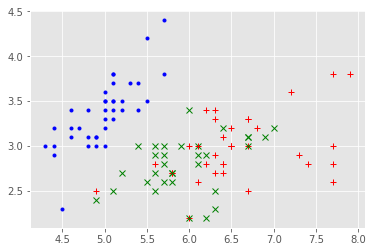

In [120]:
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches

lr = LogisticRegression()
lr.fit(x_train_nor,y_train)


y_new_index=y_train.reset_index(drop=True)

for i in range(len(x_train_nor)):
    if(y_new_index[i:i+1].loc[i,'屬種']=='Iris-setosa'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(y_new_index[i:i+1].loc[i,'屬種']=='Iris-versicolor'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'r+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
plt.legend(handles=[blue_patch,green_patch,red_patch])        
plt.show()    
        


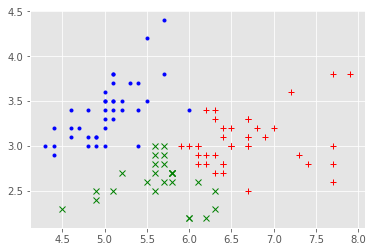

In [121]:
for i in range(len(x_train_nor)):
    if(lr.predict(x_train_nor[i].reshape(1,-1))=='Iris-setosa'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'b.')
    elif(lr.predict(x_train_nor[i].reshape(1,-1))=='Iris-versicolor'):
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'gx')
    else:
        plt.plot(x_train['花萼長度'].reset_index(drop=True)[i],x_train['花萼寬度'].reset_index(drop=True)[i],'r+')
        

